# Phase III: First ML Proof of Concept (5\%)

### Team Names:
-
-
-

## Part 1
(3%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data

In [1610]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.model_selection
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

Possible ML Ideas:
- How financially successful will a movie be? 
    - Genre (limit to the first in the list), MPAA, Review score (ratings), country 


In [1611]:
dataframe = pd.read_csv("final_merged_movie_data.csv")
print(dataframe.columns)

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'Error',
       'totalSeasons', 'Rank', 'Worldwide', 'Domestic', '%', 'Foreign', '%.1',
       'Rating', 'Popularity', 'Keywords', 'Ratings Amount'],
      dtype='object')


In [1612]:
dataframe.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Rank,Worldwide,Domestic,%,Foreign,%.1,Rating,Popularity,Keywords,Ratings Amount
0,Toy Story 3,2010,G,18 Jun 2010,103 min,"Animation, Adventure, Comedy",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,1,"$1,066,969,703","$415,004,880",38.9%,"$651,964,823",61.1%,7.799,30.310,"escape, hostage, college, villain, sequel, bud...",14838.0
1,Alice in Wonderland,2010,PG,05 Mar 2010,108 min,"Adventure, Family, Fantasy",Tim Burton,"Linda Woolverton, Lewis Carroll","Mia Wasikowska, Johnny Depp, Helena Bonham Carter",Nineteen-year-old Alice returns to the magical...,...,2,"$1,025,467,110","$334,191,110",32.6%,"$691,276,000",67.4%,6.638,26.627,"based on novel or book, queen, psychotic, fant...",14108.0
2,Harry Potter and the Deathly Hallows: Part 1,2010,PG-13,19 Nov 2010,146 min,"Adventure, Family, Fantasy",David Yates,"Steve Kloves, J.K. Rowling","Daniel Radcliffe, Emma Watson, Rupert Grint",Harry Potter is tasked with the dangerous and ...,...,3,"$960,283,305","$295,983,305",30.8%,"$664,300,000",69.2%,7.700,37.477,"witch, friendship, london, england, corruption...",19315.0
3,Inception,2010,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,4,"$828,258,695","$292,576,195",35.3%,"$535,682,500",64.7%,8.369,46.201,"rescue, mission, dreams, airplane, paris, fran...",37094.0
4,Shrek Forever After,2010,PG,21 May 2010,93 min,"Animation, Adventure, Comedy",Mike Mitchell,"Josh Klausner, Darren Lemke, William Steig","Mike Myers, Cameron Diaz, Eddie Murphy",Rumpelstiltskin tricks a mid-life crisis burde...,...,5,"$752,600,867","$238,736,787",31.7%,"$513,864,080",68.3%,6.380,37.911,"witch, sequel, ogre",7440.0


In [1613]:
def clean_box_office(df):
    """
    Cleans and processes box office data for analysis.
    
    Args:
        df (DataFrame): A DataFrame with box office data (e.g., 'Domestic', 'Worldwide', 'Foreign', 'Runtime', 'Released', 'Genre').
        
    Returns:
        df (DataFrame): A cleaned DataFrame with:
            - 'Worldwide_millions', 'Domestic_millions', 'Foreign_millions'
            - 'Runtime', 'Release Month', 'Genre', 'Genre Random'
    """

    df = df[df["Domestic"] != "-"]
    df = df.dropna(subset = ["Worldwide", "Domestic", "Foreign"])
    df["Worldwide"] = (
        df["Worldwide"]
        .astype(str)  
        .str.replace("$", "", regex=False)  
        .str.replace(",", "", regex=False)  
        .astype(int)
    )
    # Clean Domestic column
    df["Domestic"] = (
        df["Domestic"]
        .astype(str)  
        .str.replace("$", "", regex=False) 
        .str.replace(",", "", regex=False)  
    
    )
    # Clean Foreign column
    df["Foreign"] = (
        df["Foreign"]
        .astype(str)  
        .str.replace("$", "", regex=False)  
        .str.replace(",", "", regex=False)  
    )
    # Creating new columns because the raw numbers are too large to process
    df["Worldwide_millions"] = pd.to_numeric(df["Worldwide"]) / 1000000
    df["Domestic_millions"] = pd.to_numeric(df["Domestic"]) / 1000000
    df["Foreign_millions"] = pd.to_numeric(df["Foreign"], errors="coerce") / 1000000

    df = df.dropna(subset = ["Runtime"])
    df["Runtime"] = df["Runtime"].str.extract(r'(\d+)').astype(int)
    
    df["Release Month"] = pd.to_datetime(df["Released"], format='%d %b %Y').dt.month
    
    df["Genre"] = df["Genre"].apply(lambda x: [genre.strip() for genre in str(x).split(",") if genre.strip()])
    df["Genre Random"] = df["Genre"].apply(lambda x: np.random.choice(x) if isinstance(x, list) else x)
   
    return df

In [1614]:
df_clean = clean_box_office(dataframe)

In [1615]:
# only will run once
df_clean = df_clean.drop(["Type", "Poster", "DVD", "totalSeasons", "Error", \
                            "Response", "Website", "Rank", "Production", "Ratings", \
                            "imdbRating", "imdbVotes", "%", "%.1", "Popularity", "Ratings Amount",\
                            "Worldwide", "Domestic", "Foreign"], axis=1)

In [1616]:
print(df_clean.columns)

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards',
       'Metascore', 'imdbID', 'BoxOffice', 'Rating', 'Keywords',
       'Worldwide_millions', 'Domestic_millions', 'Foreign_millions',
       'Release Month', 'Genre Random'],
      dtype='object')


In [1617]:
df_clean.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbID,BoxOffice,Rating,Keywords,Worldwide_millions,Domestic_millions,Foreign_millions,Release Month,Genre Random
0,Toy Story 3,2010,G,18 Jun 2010,103,"[Animation, Adventure, Comedy]",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,92.0,tt0435761,"$415,004,880",7.799,"escape, hostage, college, villain, sequel, bud...",1066.969703,415.004880,651.964823,6,Adventure
1,Alice in Wonderland,2010,PG,05 Mar 2010,108,"[Adventure, Family, Fantasy]",Tim Burton,"Linda Woolverton, Lewis Carroll","Mia Wasikowska, Johnny Depp, Helena Bonham Carter",Nineteen-year-old Alice returns to the magical...,...,53.0,tt1014759,"$334,191,110",6.638,"based on novel or book, queen, psychotic, fant...",1025.467110,334.191110,691.276000,3,Adventure
2,Harry Potter and the Deathly Hallows: Part 1,2010,PG-13,19 Nov 2010,146,"[Adventure, Family, Fantasy]",David Yates,"Steve Kloves, J.K. Rowling","Daniel Radcliffe, Emma Watson, Rupert Grint",Harry Potter is tasked with the dangerous and ...,...,65.0,tt0926084,"$296,374,621",7.700,"witch, friendship, london, england, corruption...",960.283305,295.983305,664.300000,11,Adventure
3,Inception,2010,PG-13,16 Jul 2010,148,"[Action, Adventure, Sci-Fi]",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,74.0,tt1375666,"$292,587,330",8.369,"rescue, mission, dreams, airplane, paris, fran...",828.258695,292.576195,535.682500,7,Sci-Fi
4,Shrek Forever After,2010,PG,21 May 2010,93,"[Animation, Adventure, Comedy]",Mike Mitchell,"Josh Klausner, Darren Lemke, William Steig","Mike Myers, Cameron Diaz, Eddie Murphy",Rumpelstiltskin tricks a mid-life crisis burde...,...,58.0,tt0892791,"$238,736,787",6.380,"witch, sequel, ogre",752.600867,238.736787,513.864080,5,Adventure


In [1618]:
# bias column
def add_bias_column(X):
    """ 
        Adds a bias column
    """

    if len(np.array(X).shape) == 1:
        X = np.array(X).reshape(-1, 1)
    bias = np.ones((X.shape[0], 1))
    
    return np.hstack([bias, X])

In [1619]:
def preprocess(df):
    """
    Preprocesses the input DataFrame by encoding categorical variables and extracting features and target.

    Args:
        df (DataFrame): A pandas DataFrame containing columns like 'Runtime', 'overall_rating', 'Genre Random', 'MPAA', 
                        'Country', and 'Worldwide_millions' to be processed for machine learning.

    Returns:
        X (array): A 2D numpy array containing the feature values for model training.
        y (array): A 1D numpy array containing the target values ('Worldwide_millions').
    """

    drop_cols = ['Title', 'Released', 'Genre', 'Poster', 'DVD', 'Type', 
                 'Production', 'Website', 'Response', 'Error', 'Year', 'Metascore',
                 'Foreign_millions']
    df = df.drop(columns=[col for col in df.columns if col in drop_cols], errors='ignore')
    df = df.dropna(subset=["Runtime", "Country", "Rated", "Rating", "Worldwide_millions"])

    cat_cols = []
    for col in ["Genre Random", "Country", "Rated"]:
        if col in df.columns:
            cat_cols.append(col)
    if cat_cols:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    
    target = "Worldwide_millions"
    # Drop object columns that weren't converted to dummies
    object_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' and col != target:
            object_cols.append(col)
    
    if object_cols:
        print(f"Dropping object columns: {object_cols}")
        df = df.drop(columns=object_cols)
    
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in dataframe.")
    
    feature_cols = [col for col in df.columns if col != target]
    
    # Ensure df has only numeric columns before creating X and y
    print("DataFrame dtypes after preprocessing:")
    print(df.dtypes)
    
    # Create X & y AFTERall preprocessing is done
    X = df[feature_cols].values
    y = df[target].values
    
    # Convert X to float64 which supports np.isnan
    X = X.astype(np.float64)
    
    # Handle NaN values using imputation
    if np.isnan(X).any():
        print("Warning: X contains NaN values. Imputing with mean...")
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)
    
    print("Feature matrix shape:", X.shape)
    print("Feature names:", feature_cols)
    print("Target vector shape:", y.shape)
    
    return X, y, df

In [1620]:
from sklearn.linear_model import LinearRegression

def line_of_best_fit(X, y):
    """
    Returns slope and intercept of a line of best fit.
    
    Args:
        X (array): can be either 1-d or 2-d
        y (array): a 1-d array including all corresponding response values to X
        
    Returns:
        vector (array): vector containing the coefficients for line of best fit; first term is intercept, the second is slope
    """

    X_with_bias = add_bias_column(X)
    model = LinearRegression(fit_intercept=False)
    model.fit(X_with_bias, y)
    
    # Return coefficients as a numpy array
    return model.coef_

In [1621]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def linreg_predict(Xnew, ynew, m):
    """
    Args:
        Xnew (array): either a 1-d or 2-d array
        ynew (array): 1-d array 
        m (array): 1-d array contains coefficients from the line_of_best_fit function

    Returns:
        dct (dictionary): contains four key-value pairs
            - ypreds: predicted values from applying m to Xnew
            - resids: the residuals, the differences between ynew and ypreds
            - mse: mean squared error
            - r2: coefficient of determination
    """
    x = add_bias_column(Xnew)
    
    # Ensure m has the right shape
    if len(m) != x.shape[1]:
        raise ValueError(f"Coefficient vector shape {m.shape} doesn't match input shape {x.shape}. "
                         f"Expected coefficient length: {x.shape[1]}")
    
    ypreds = x.dot(m)
    resids = ynew - ypreds
    mse = mean_squared_error(ynew, ypreds)
    r2 = r2_score(ynew, ypreds)
    
    dct = {
        'ypreds': ypreds,
        'resids': resids,
        'mse': mse,
        'r2': r2
    }
    return dct

In [1622]:
def evaluate_reg_model(X, y):
    print(f"Data shapes before splitting - X: {X.shape}, y: {y.shape}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    print(f"Training data shapes - X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Test data shapes - X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    coefficients = line_of_best_fit(X_train, y_train)
    print("Coefficients shape:", coefficients.shape)
    
    results = linreg_predict(X_test, y_test, coefficients)
    print("Linear Regression Model MSE:", results['mse'])
    print("Linear Regression Model R^2:", results['r2'])
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, results['ypreds'], alpha=0.7)
    plt.xlabel("Actual Worldwide Box Office (millions)")
    plt.ylabel("Predicted Worldwide Box Office (millions)")
    plt.xlim(0, 2200)
    plt.ylim(0, 1400)
    plt.title("Actual v. Predicted Box Office in Linear Regression Model")
    
    min_val = min(y_test.min(), results['ypreds'].min())
    max_val = max(y_test.max(), results['ypreds'].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--')
    plt.show()
    return results

In [1623]:
# df_clean.columns


Dropping object columns: ['Director', 'Writer', 'Actors', 'Plot', 'Language', 'Awards', 'imdbID', 'BoxOffice', 'Keywords']
DataFrame dtypes after preprocessing:
Runtime                 int64
Rating                float64
Worldwide_millions    float64
Domestic_millions     float64
Release Month           int32
                       ...   
Rated_PG                 bool
Rated_PG-13              bool
Rated_R                  bool
Rated_TV-MA              bool
Rated_TV-PG              bool
Length: 361, dtype: object
Feature matrix shape: (1247, 360)
Feature names: ['Runtime', 'Rating', 'Domestic_millions', 'Release Month', 'Genre Random_Adventure', 'Genre Random_Animation', 'Genre Random_Biography', 'Genre Random_Comedy', 'Genre Random_Crime', 'Genre Random_Documentary', 'Genre Random_Drama', 'Genre Random_Family', 'Genre Random_Fantasy', 'Genre Random_History', 'Genre Random_Horror', 'Genre Random_Music', 'Genre Random_Musical', 'Genre Random_Mystery', 'Genre Random_Romance', 'Genre Rando

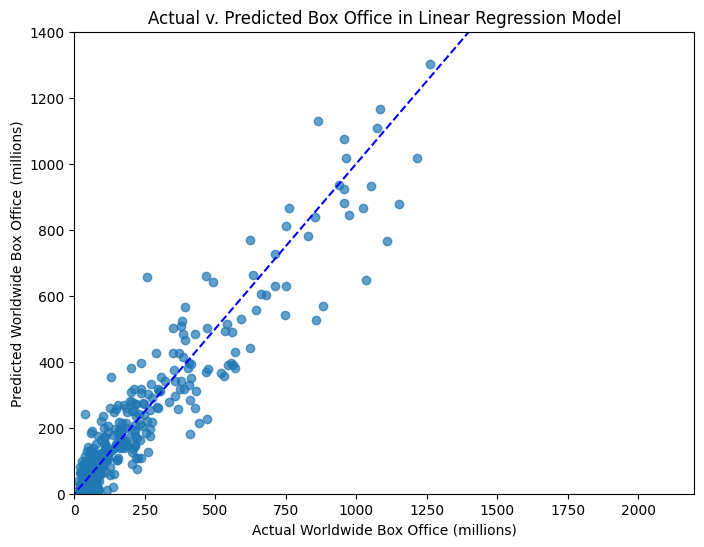

In [1624]:
def main():
    try:
        X, y, df = preprocess(df_clean)
    except ValueError as e:
        print("Preprocessing error: ", e)
        return

    evaluate_reg_model(X, y)

if __name__ == '__main__':
    main()


## Part 2
(2%) A discussion of the preliminary results:
   - This may include checking of assumptions, generated plots/tables, measures of fit, or other attributes of the analysis
   - It does not have to be fully correct, but as a proof of concept must demonstrate that the group is close to completing the analysis

Ethical discussion:

- There could potentially be some representational bias due to the fact that the data collected may be only including the most popular movies from major studios, while more indie movies would not be included (even if it was successful). This could potentially skew the data towards more dominant groups and limit the visibility of other diverse film/film makers.
- Additionally, there could be allocative bias in our data since most of the movies we have scrapped seemed to be in the action genre. This in turn could make our ML biased towards action movies and underestimate the success potential of other movies genres such as horror.
- The last ethical concern that comes to mind is that there could be some potential bias in our data cleaning process. For example, some movies have more than one genre, however we are only interested in the first genre in the list. This can in turn underrepresent some genres within our ML